**Question 2: Convolution Operations with Different Parameters \
Task: Implement Convolution with Different Stride and Padding**


In [1]:
import numpy as np
import tensorflow as tf

# Define the 5x5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Define the 3x3 kernel
kernel = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
], dtype=np.float32)

# Reshape input and kernel for TensorFlow
input_tensor = input_matrix.reshape(1, 5, 5, 1)  # Batch size = 1, Channels = 1
kernel_tensor = kernel.reshape(3, 3, 1, 1)  # Kernel shape (height, width, in_channels, out_channels)

# Define strides and paddings
configurations = [
    (1, "VALID"),
    (1, "SAME"),
    (2, "VALID"),
    (2, "SAME")
]

# Perform convolution for each case
for stride, padding in configurations:
    output = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
    print(f"Stride = {stride}, Padding = {padding}")
    print(output.numpy().squeeze(), "\n")  # Squeeze to remove single-dimensional entries


Stride = 1, Padding = VALID
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

Stride = 1, Padding = SAME
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]] 

Stride = 2, Padding = VALID
[[0. 0.]
 [0. 0.]] 

Stride = 2, Padding = SAME
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]] 



**Question 3: CNN Feature Extraction with Filters and Pooling \
Task 1: Implement Edge Detection Using Convolution**

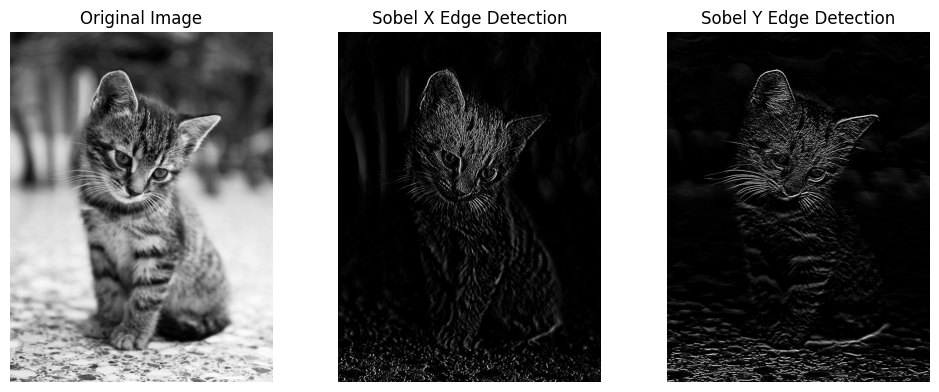

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image
image_path = 'D:\cat.jfif' 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define Sobel filters
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=np.float32)

# Apply the Sobel filters using OpenCV
sobel_x_output = cv2.filter2D(image, -1, sobel_x)
sobel_y_output = cv2.filter2D(image, -1, sobel_y)

# Display the images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_x_output, cmap='gray')
plt.title("Sobel X Edge Detection")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_y_output, cmap='gray')
plt.title("Sobel Y Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


**Task 2: Implement Max Pooling and Average Pooling**

In [4]:
import numpy as np
import tensorflow as tf

# Create a random 4x4 matrix as input
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)

# Define Max Pooling and Average Pooling layers
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')

# Apply pooling operations
max_pooled = max_pool(input_matrix)
avg_pooled = avg_pool(input_matrix)

# Print results
print("Original Matrix:\n", input_matrix.squeeze())
print("\nMax Pooled Matrix:\n", max_pooled.numpy().squeeze())
print("\nAverage Pooled Matrix:\n", avg_pooled.numpy().squeeze())


Original Matrix:
 [[3. 4. 5. 7.]
 [6. 1. 0. 6.]
 [4. 2. 6. 5.]
 [0. 3. 9. 5.]]

Max Pooled Matrix:
 [[6. 7.]
 [4. 9.]]

Average Pooled Matrix:
 [[3.5  4.5 ]
 [2.25 6.25]]


**Question 4: Implementing and Comparing CNN Architectures \
Task 1: Implement AlexNet Architecture**


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Define the AlexNet model
model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),

    # 2nd Convolutional Layer
    layers.Conv2D(256, (5, 5), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    # 3rd Convolutional Layer
    layers.Conv2D(384, (3, 3), activation='relu', padding="same"),
    # 4th Convolutional Layer
    layers.Conv2D(384, (3, 3), activation='relu', padding="same"),
    # 5th Convolutional Layer
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    # Flatten layer
    layers.Flatten(),
    # 1st Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    # 2nd Fully Connected Layer
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    # Output Layer
    layers.Dense(10, activation='softmax')
])
# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

**Task 2: Implement a Residual Block and ResNet**

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Function to create a Residual Block
def residual_block(input_tensor, filters=64):
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    # Add skip connection
    x = layers.Add()([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x
# Define ResNet-like Model
def build_resnet():
    inputs = Input(shape=(224, 224, 3))

    # Initial Convolutional Layer
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)

    # Two Residual Blocks
    x = residual_block(x)
    x = residual_block(x)
    # Flatten and Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # Create model
    model = models.Model(inputs, outputs)
    return model
# Build and print model summary
resnet_model = build_resnet()
print("\nResNet-like Model Summary:\n")
resnet_model.summary()



ResNet-like Model Summary:



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 112, 112, 64)   │              0 │ conv2d_7[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 64)   │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 64)   │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 112, 112, 64)   │              0 │ conv2d_9[0][0],        │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 112, 112, 64)   │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 802816)         │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │    102,760,576 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 102,919,050 (392.61 MB)

 Trainable params: 102,919,050 (392.61 MB)

 Non-trainable params: 0 (0.00 B)